Plotting

In [2]:
# Mount Drive 
from google.colab import drive

drive.mount('/content/gdrive')


#Change to the correct directory
import os
os.chdir('/content/gdrive/My Drive/junior/442')

!ls
!pwd


#Make imports
import torch
from PIL import Image
import os
import numpy as np
import PIL
import copy
import matplotlib.pyplot as plt


# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print("Using the GPU!")
else:
    print("WARNING: Could not find GPU! Using CPU only. If you want to enable GPU, please to go Edit > Notebook Settings > Hardware Accelerator and select GPU.")


Mounted at /content/gdrive
 15vs20Top1TestScores.png   models   png224	    Top1vsTop5TestScores.png
'Colab Notebooks'	    png      png224output   ValidationAccuracy.png
/content/gdrive/My Drive/junior/442
Using the GPU!


In [4]:
model_types_to_train = ["alexnet", "vgg", "squeezenet", "densenet", "resnet"]

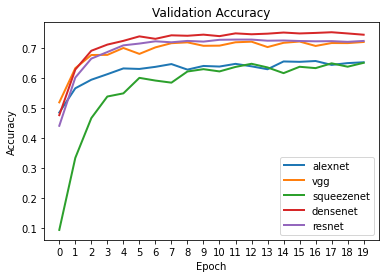

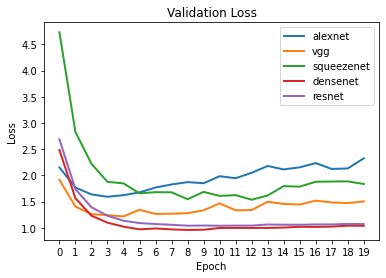

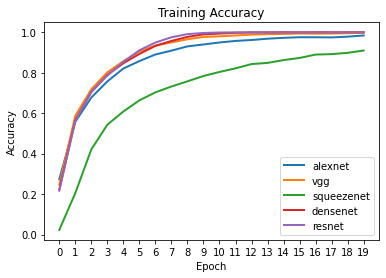

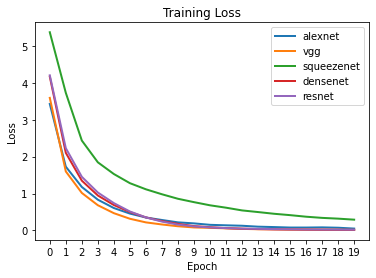

In [9]:
epochs = 20
x = np.arange(epochs)


def plotFigure(fileinput, title, yaxis, fileoutput):
  plt.figure()
  for model in model_types_to_train:
    hist = torch.load(fileinput + '{}.pth'.format(model))
    plt.plot(x, hist, label='%s' % model, linewidth=2)


  plt.xticks(x)
  plt.xlabel('Epoch')
  plt.ylabel(yaxis)
  plt.title(title)
  plt.savefig(fileoutput)
  plt.legend()
  plt.show()

plotFigure('models/pretrained_224val_acc_Hist_', "Validation Accuracy", "Accuracy", "ValidationAccuracy.png")
plotFigure('models/pretrained_224val_loss_Hist_', "Validation Loss", "Loss", "ValidationLoss.png")
plotFigure('models/pretrained_224train_acc_Hist_', "Training Accuracy", "Accuracy", "TrainingAccuracy.png")
plotFigure('models/pretrained_224train_loss_Hist_', "Training Loss", "Loss", "TrainingLoss.png")
#  torch.save(val_acc_history, 'models/{}_224val_acc_Hist_{}.pth'.format(addition, model_name))
#  torch.save(val_loss_history, 'models/{}_224val_loss_Hist_{}.pth'.format(addition, model_name))
#  torch.save(train_acc_history, 'models/{}_224train_acc_Hist_{}.pth'.format(addition, model_name))
#  torch.save(train_loss_history, 'models/{}_224train_loss_Hist_{}.pth'.format(addition, model_name))




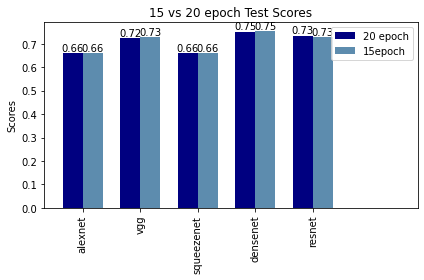

In [11]:
N = 5

top1_20 = (0.659, 0.72425, 0.6595, 0.75175, 0.735)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, top1_20, width, color='#000080')

top1_15= (0.66125, 0.72875, 0.6585, 0.75325, 0.72875)
rects2 = ax.bar(ind + width,top1_15, width, color='#5D8CAE')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('15 vs 20 epoch Test Scores')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((('alexnet', 'vgg', 'squeezenet', 'densenet', 'resnet') ), rotation='vertical')   
ax.set_xlim(-.5, N + 1)
ax.legend((rects1[0], rects2[0]), ('20 epoch', '15epoch'), loc="upper right")


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%0.2f' % (height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.savefig('15vs20Top1TestScores' ) 
plt.show()

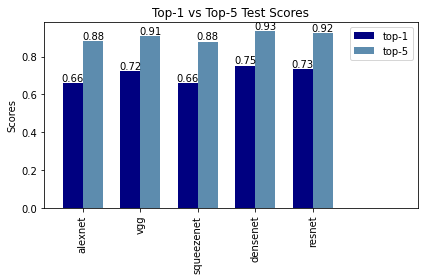

In [12]:
N = 5

top1_20 = (0.659, 0.72425, 0.6595, 0.75175, 0.735)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, top1_20, width, color='#000080')

top5_20= (0.8805, 0.909, 0.87925, 0.93375, 0.923)
rects2 = ax.bar(ind + width,top5_20, width, color='#5D8CAE')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Top-1 vs Top-5 Test Scores')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((('alexnet', 'vgg', 'squeezenet', 'densenet', 'resnet') ), rotation='vertical')   
ax.set_xlim(-.5, N + 1)
ax.legend((rects1[0], rects2[0]), ('top-1', 'top-5'), loc="upper right")



autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.savefig('Top1vsTop5TestScores' ) 
plt.show()


In [ ]:
20 Epoch fine tuning
| Model type | top-1  | top-5  |
|------------|---|---|
| alexnet    | 0.659  | 0.8805  |
| vgg        | 0.72425  | 0.909   |
| squeezenet | 0.6595  | 0.87925  |
| densenet   | 0.75175  | 0.93375  |
| resnet     | 0.735  | 0.923  |


15 Epoch fine tuning
| Model type | top-1  | top-5  |
|------------|---|---|
| alexnet    | 0.66125  | 0.874  |
| vgg        | 0.7215  | 0.909   |
| squeezenet | 0.6585  | 0.87  |
| densenet   | 0.75325  | 0.93  |
| resnet     | 0.72875  | 0.92075  |


Vanilla models - no fine tuning
| Model type | top-1  | top-5  |
|------------|---|---|
| alexnet    | 0.005  | 0.02375  |
| vgg        | 0.00425  | 0.022   |
| squeezenet | 0.0055  | 0.026  |
| densenet   | 0.0025  | 0.02325  |
| resnet     | 0.00425  | 0.02275  |